<a href="https://colab.research.google.com/github/fabiobrambilla98/InfoRetrival/blob/main/Esercizio_clustering_lesson_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

In [4]:
import csv

In [8]:
path = "/content/tweet_emotions.csv"
D = pd.read_csv(path)


In [9]:
[x for x in D]

['tweet_id', 'sentiment', 'content']

In [10]:
n_class = len(set(D['sentiment'][:3000]))
n_class

13

In [11]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [12]:
tokenizer = lambda y: [x.lemma_ for x in nlp(y) if x.pos_ not in ['PUNCT', 'PRON', 'ADJ', 'SPACE', 'PROPN', 'ADP', 'CCONJ']]

In [13]:
g = [x for x in D['content']]

In [41]:
for word in nlp(g[0]):
  print(word, word.pos_)

@tiffanylue PROPN
i PRON
know VERB
  SPACE
i PRON
was AUX
listenin ADJ
to ADP
bad ADJ
habit NOUN
earlier ADV
and CCONJ
i PRON
started VERB
freakin NOUN
at ADP
his PRON
part NOUN
=[ NOUN


In [14]:
tokenizer(g[0])

['know', 'be', 'habit', 'early', 'start', 'freakin', 'part', '=[']

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
vectorizer = TfidfVectorizer()

In [17]:
corpus = [x for x in D['content']]

In [18]:
X = vectorizer.fit_transform(corpus[:3000])

In [83]:
X.shape

(3000, 4548)

In [19]:
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

In [22]:
algorithms = {
    'Kmeans': KMeans(n_clusters=n_class),
    'AffinityPropagation': AffinityPropagation(random_state=None, max_iter=500, convergence_iter=35),
    'Completelinkage': AgglomerativeClustering(n_clusters=n_class, linkage='complete'),
    'Singlelinkage': AgglomerativeClustering(n_clusters=n_class, linkage='single'),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5)
}
results = {}

In [23]:
for alg, imp in algorithms.items():
    results[alg] = imp.fit_predict(X.toarray())

In [89]:
 y_pred =  DBSCAN(eps=0.3, min_samples=4).fit_predict(X.toarray())

In [24]:
y = [x for x in D['sentiment'][:3000]]

In [25]:
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.metrics.cluster import completeness_score

In [26]:
for alg, y_pred in results.items():
    print(alg, adjusted_rand_score(y, y_pred))

Kmeans 0.0008339073131371293
AffinityPropagation 0.0004975765750324369
Completelinkage -0.00058776004259613
Singlelinkage 0.0019974482973491255
DBSCAN 0.0


In [27]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

ValueError: ignored

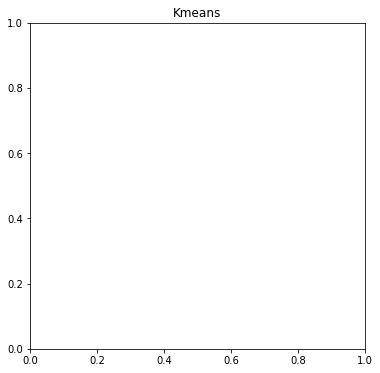

In [34]:
for alg, y_pred in results.items():
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_title(alg)
    ax.scatter(X[:,0], X[:,1], alpha=0.2)
    plt.show()